In [3]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [5]:
# Loading Dataset

Task_Manage = pd.read_csv("D:\DS with Py\Data Science Datasets\Task_Manage.csv")
Task_Manage

,TaskID,TaskTitle,Priority,Duration(min),Deadline,Context,IsRecurring,SuggestedTimeWindow,AssignedTo,Status
0,1,Prepare monthly financial report,Low,120,2025-05-03 07:07,Work,Yes,Weekday Evening,UserA,On-Hold
1,2,Update team on project progress,Medium,90,2025-05-23 07:07,Home,No,Weekend Morning,UserC,To-Do
2,3,Organize team-building activity,High,60,2025-05-12 07:07,Learning,Yes,Weekend Evening,UserA,Completed
3,4,Submit quarterly taxes,Medium,30,2025-05-06 07:07,Work,Yes,Weekend Morning,UserC,Completed
4,5,Fix login authentication bug,Low,90,2025-05-14 07:07,Personal,Yes,Weekday Afternoon,UserB,In Progress
5,6,Review client feedback,High,90,2025-05-12 07:07,Work,No,Weekend Morning,UserC,Completed
6,7,Design marketing banner for campaign,High,45,2025-05-15 07:07,Learning,No,Weekend Afternoon,UserC,To-Do
7,8,Analyze survey results from Q1,Medium,30,2025-04-28 07:07,Learning,No,Weekend Evening,UserA,On-Hold
8,9,Backup database to cloud storage,Medium,30,2025-04-28 07:07,Personal,Yes,Weekend Evening,UserA,On-Hold
9,10,Schedule one-on-one with team members,Medium,120,2025-04-26 07:07,Home,Yes,Weekday Morning,UserA,Completed


In [8]:
Task_Manage['Deadline'] = pd.to_datetime(Task_Manage['Deadline'])


In [9]:
Task_Manage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TaskID               50 non-null     int64         
 1   TaskTitle            50 non-null     object        
 2   Priority             50 non-null     object        
 3   Duration(min)        50 non-null     int64         
 4   Deadline             50 non-null     datetime64[ns]
 5   Context              50 non-null     object        
 6   IsRecurring          50 non-null     object        
 7   SuggestedTimeWindow  50 non-null     object        
 8   AssignedTo           50 non-null     object        
 9   Status               50 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 4.0+ KB


In [10]:
Task_Manage.describe()

,TaskID,Duration(min),Deadline
count,50.00000,50.000000,50
mean,25.50000,65.400000,2025-05-07 11:55:00
min,1.00000,30.000000,2025-04-24 07:07:00
25%,13.25000,45.000000,2025-05-01 07:07:00
50%,25.50000,60.000000,2025-05-06 19:07:00
75%,37.75000,90.000000,2025-05-14 01:07:00
max,50.00000,120.000000,2025-05-23 07:07:00
std,14.57738,31.017441,NaN


In [11]:
Task_Manage.head()

,TaskID,TaskTitle,Priority,Duration(min),Deadline,Context,IsRecurring,SuggestedTimeWindow,AssignedTo,Status
0,1,Prepare monthly financial report,Low,120,2025-05-03 07:07:00,Work,Yes,Weekday Evening,UserA,On-Hold
1,2,Update team on project progress,Medium,90,2025-05-23 07:07:00,Home,No,Weekend Morning,UserC,To-Do
2,3,Organize team-building activity,High,60,2025-05-12 07:07:00,Learning,Yes,Weekend Evening,UserA,Completed
3,4,Submit quarterly taxes,Medium,30,2025-05-06 07:07:00,Work,Yes,Weekend Morning,UserC,Completed
4,5,Fix login authentication bug,Low,90,2025-05-14 07:07:00,Personal,Yes,Weekday Afternoon,UserB,In Progress


In [12]:
Task_Manage.tail()

,TaskID,TaskTitle,Priority,Duration(min),Deadline,Context,IsRecurring,SuggestedTimeWindow,AssignedTo,Status
45,46,Record tutorial video,High,90,2025-04-28 07:07:00,Learning,Yes,Weekend Evening,UserC,Completed
46,47,Assign mentors to interns,Medium,45,2025-05-15 07:07:00,Home,Yes,Weekend Morning,UserC,Completed
47,48,Schedule performance reviews,Medium,30,2025-04-24 07:07:00,Learning,Yes,Weekend Morning,UserA,Completed
48,49,Update software licenses,Medium,90,2025-05-03 07:07:00,Work,Yes,Weekday Afternoon,UserB,To-Do
49,50,Submit budget proposal,Medium,45,2025-05-16 07:07:00,Learning,No,Weekday Evening,UserC,On-Hold


In [13]:
# Priority Distribution

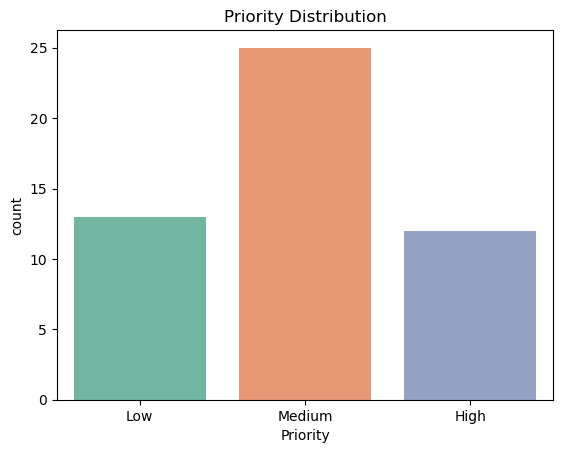

In [16]:
sns.countplot(data=Task_Manage, x="Priority", palette="Set2")
plt.title("Priority Distribution")
plt.show()


In [17]:
# Sentiment Analysis

def get_sentiment(text):
    blob = TextBlob(text)
    return "Positive" if blob.sentiment.polarity > 0 else "Negative" if blob.sentiment.polarity < 0 else "Neutral"

Task_Manage["Sentiment"] = Task_Manage["TaskTitle"].apply(get_sentiment)

In [25]:
Task_Manage["Sentiment"]. tolist()

['Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral']

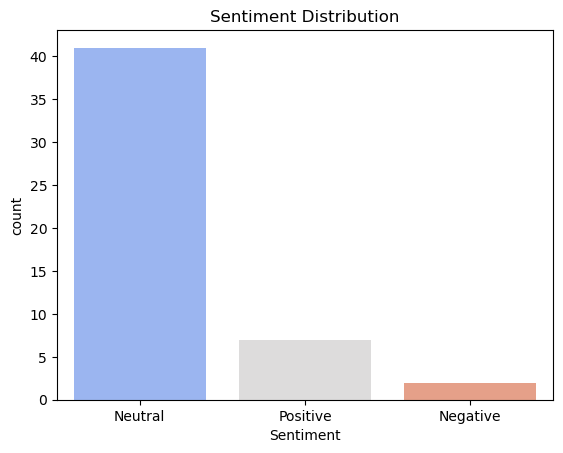

In [21]:
# Sentiment Distribution

sns.countplot(data=Task_Manage, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

In [59]:
# Machine learning Libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [60]:
# Features and Labels
X = Task_Manage["TaskTitle"]
y = Task_Manage["Priority"]

In [61]:
# TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

In [62]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [63]:
# Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.4000
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         3
         Low       0.00      0.00      0.00         3
      Medium       0.40      1.00      0.57         4

    accuracy                           0.40        10
   macro avg       0.13      0.33      0.19        10
weighted avg       0.16      0.40      0.23        10



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Save model and vectorizer
import joblib
joblib.dump(model, "priority_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']